In [2]:
import pandas as pd
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',header=0,index_col=0,parse_dates=True,na_values=-99.99)
rets = me_m[['Lo 10','Hi 10']]
rets.columns = ['SmallCap','LargeCap']
rets = rets/100


<AxesSubplot:>

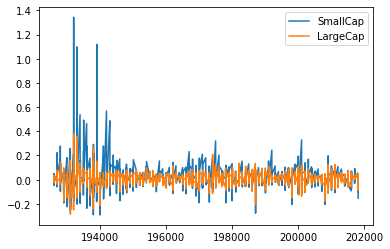

In [4]:
rets.plot.line()

In [6]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [9]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [10]:
rets.index = pd.to_datetime(rets.index,format='%Y%m')

In [11]:
rets

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


In [12]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [13]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [14]:
rets['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [15]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

# Compute Drawdowns
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown - (1-%of wealth index as a percentage of the previous peak)

In [21]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()

In [22]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

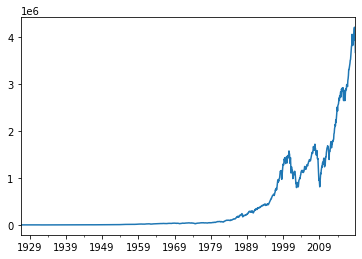

In [23]:
wealth_index.plot.line()

In [24]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

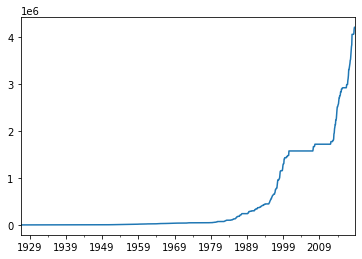

In [26]:
previous_peaks.plot.line()

In [27]:
drawdown= (wealth_index - previous_peaks)/previous_peaks

<AxesSubplot:>

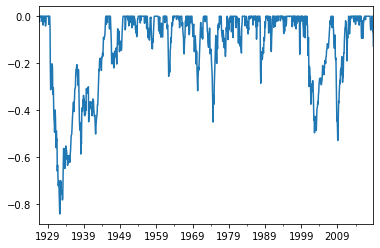

In [28]:
drawdown.plot()

In [29]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [30]:
drawdown.min() #biggest drawdownn

-0.8400375277943123

In [31]:
drawdown['1975':].min() # biggest drawdown since 1975

-0.5280945042309304

In [32]:
drawdown['1975':].idxmin() # when did the biggest drawdown happen, or in other words when was the trough

Period('2009-02', 'M')

## compute a function that works for any series

In [35]:
def drawdown(return_series:pd.Series):
    '''
    The pd.Series just alerts python that the input should be of time time-series
    Takes a time series of asset returns
    Computes and returns a Dataframe which contains:
    the wealth index
    the previous peaks
    percent drawdowns
    '''
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index .cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        'Wealth':wealth_index,
        'Peaks' : previous_peaks,
        'Drawdown': drawdowns
    })


In [38]:
Large_Cap = drawdown(rets['LargeCap'])

<AxesSubplot:>

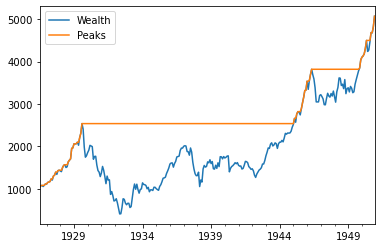

In [41]:
Large_Cap[:'1950'][['Wealth','Peaks']].plot() #look at wealth and peaks of the large caps uptill 1950

In [46]:
Large_Cap['Drawdown'].idxmin()

Period('1932-05', 'M')